# Exploratory Data Analysis - HOME Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Import CSV - Training Data

In [3]:
df1 = pd.read_csv('train_home_study.csv', index_col='Id')
df2 = pd.read_csv('test_home_study.csv', index_col='Id')

In [4]:
home = pd.merge(df1, df2, how='outer')

In [5]:
home.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 2916
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2913 non-null   object 
 2   LotFrontage    2431 non-null   float64
 3   LotArea        2917 non-null   int64  
 4   Street         2917 non-null   object 
 5   Alley          197 non-null    object 
 6   LotShape       2917 non-null   object 
 7   LandContour    2917 non-null   object 
 8   Utilities      2915 non-null   object 
 9   LotConfig      2917 non-null   object 
 10  LandSlope      2917 non-null   object 
 11  Neighborhood   2917 non-null   object 
 12  Condition1     2917 non-null   object 
 13  Condition2     2917 non-null   object 
 14  BldgType       2917 non-null   object 
 15  HouseStyle     2917 non-null   object 
 16  OverallQual    2917 non-null   int64  
 17  OverallCond    2917 non-null   int64  
 18  YearBuil

In [7]:
home.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2917.000000,2431.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.00000,2894.000000,2916.000000,2916.000000,2916.000000,2916.000000,2917.000000,2917.000000,2917.000000,2917.000000,2915.000000,2915.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2758.000000,2916.000000,2916.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,1460.000000
mean,57.067192,69.343069,10173.348989,6.088447,5.564964,1971.290024,1984.25060,102.254665,441.725995,49.616255,560.618313,1051.960562,1159.865958,336.247515,4.670209,1500.783682,0.430189,0.061407,1.567707,0.380185,2.860473,1.044566,6.452177,0.597532,1978.094271,1.766461,472.903978,93.774083,47.448749,23.114158,2.604045,16.073363,2.253342,50.860816,6.213233,2007.793966,180921.195890
std,42.446750,23.318283,7887.164614,1.410229,1.113414,30.289349,20.89478,179.383535,455.620308,169.258662,439.628459,440.835391,392.302052,428.750767,46.391690,506.183736,0.524795,0.245766,0.553043,0.502864,0.822817,0.214532,1.569228,0.646162,25.573675,0.761861,215.461785,126.546161,67.562874,64.263424,25.196714,56.202054,35.676126,567.595198,2.715561,1.314577,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.00000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7488.000000,5.000000,5.000000,1953.000000,1965.00000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9457.000000,6.000000,5.000000,1973.000000,1993.00000,0.000000,369.500000,0.000000,467.000000,990.000000,1083.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11577.000000,7.000000,6.000000,2001.000000,2004.00000,164.000000,733.250000,0.000000,804.500000,1302.000000,1388.000000,704.000000,0.000000,1744.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.00000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Missing Data Treatment

In [8]:
miss_val=home.isnull().sum()
miss_val[miss_val>0]/len(home)*100

MSZoning         0.137127
LotFrontage     16.660953
Alley           93.246486
Utilities        0.068564
Exterior1st      0.034282
Exterior2nd      0.034282
MasVnrType       0.822763
MasVnrArea       0.788481
BsmtQual         2.776826
BsmtCond         2.811107
BsmtExposure     2.811107
BsmtFinType1     2.708262
BsmtFinSF1       0.034282
BsmtFinType2     2.742544
BsmtFinSF2       0.034282
BsmtUnfSF        0.034282
TotalBsmtSF      0.034282
Electrical       0.034282
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
KitchenQual      0.034282
Functional       0.068564
FireplaceQu     48.611587
GarageType       5.382242
GarageYrBlt      5.450806
GarageFinish     5.450806
GarageCars       0.034282
GarageArea       0.034282
GarageQual       5.450806
GarageCond       5.450806
PoolQC          99.657182
Fence           80.425094
MiscFeature     96.400411
SaleType         0.034282
SalePrice       49.948577
dtype: float64

### 17% data of LotFrontage

In [9]:
home.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.415191,-0.200591,0.032636,-0.064920,0.032670,0.041805,0.006164,-0.062849,-0.072190,-0.127115,-0.219442,-0.247508,0.308666,0.025281,0.071942,0.011335,-0.001466,0.138150,0.178778,-0.008087,0.261028,0.041617,-0.053741,0.086241,-0.047202,-0.103274,-0.016461,-0.017330,-0.020312,-0.037433,-0.048807,-0.002981,-0.028776,-0.001103,-0.012799,-0.084284
LotFrontage,-0.415191,1.000000,0.489118,0.219022,-0.076459,0.124784,0.093232,0.220771,0.218355,0.047046,0.114652,0.354505,0.457576,0.027920,0.006055,0.383017,0.112175,-0.026058,0.183280,0.039966,0.234631,0.004341,0.349280,0.261044,0.078555,0.311598,0.360075,0.121110,0.166567,0.010939,0.028176,0.075521,0.174284,0.044200,0.011136,-0.010097,0.351799
LotArea,-0.200591,0.489118,1.000000,0.101016,-0.035969,0.024873,0.022270,0.125358,0.193512,0.083893,0.021712,0.253865,0.332031,0.032066,0.001059,0.284588,0.127874,0.026135,0.126412,0.034424,0.132579,-0.020999,0.213563,0.260731,-0.007911,0.180701,0.213194,0.157634,0.105431,0.020743,0.015932,0.054204,0.093696,0.068992,0.004105,-0.025164,0.263843
OverallQual,0.032636,0.219022,0.101016,1.000000,-0.093644,0.597400,0.571369,0.433236,0.282370,-0.042648,0.275030,0.549743,0.479927,0.245331,-0.048759,0.575285,0.164968,-0.040628,0.528323,0.272699,0.073294,-0.159258,0.390257,0.391333,0.571650,0.600713,0.565310,0.255730,0.297920,-0.139123,0.018763,0.043044,0.030773,0.005603,0.030446,-0.019024,0.790982
OverallCond,-0.064920,-0.076459,-0.035969,-0.093644,1.000000,-0.368280,0.048011,-0.136180,-0.050775,0.041404,-0.138057,-0.174260,-0.157878,0.005775,0.009318,-0.116613,-0.042431,0.084104,-0.215296,-0.088534,-0.008632,-0.086781,-0.092287,-0.031332,-0.325608,-0.181703,-0.154237,0.019871,-0.068735,0.070928,0.043707,0.043618,-0.016900,0.033928,-0.006284,0.029649,-0.077856
YearBuilt,0.032670,0.124784,0.024873,0.597400,-0.368280,1.000000,0.611955,0.314537,0.280515,-0.027387,0.130167,0.409219,0.311897,0.016996,-0.144898,0.242842,0.212332,-0.030108,0.470874,0.269761,-0.052797,-0.137516,0.114845,0.171495,0.834680,0.538082,0.481095,0.230121,0.198113,-0.373973,0.016042,-0.040849,0.002353,-0.010824,0.013999,-0.011332,0.522897
YearRemodAdd,0.041805,0.093232,0.022270,0.571369,0.048011,0.611955,1.000000,0.197246,0.152868,-0.061980,0.164921,0.298667,0.243155,0.158541,-0.060938,0.317153,0.135567,-0.046134,0.457704,0.211399,-0.021622,-0.142341,0.198819,0.134854,0.652119,0.425969,0.377027,0.219117,0.241827,-0.220298,0.037514,-0.046705,-0.011369,-0.003066,0.017746,0.034142,0.507101
MasVnrArea,0.006164,0.220771,0.125358,0.433236,-0.136180,0.314537,0.197246,1.000000,0.303321,-0.015734,0.090295,0.397122,0.395690,0.121277,-0.057635,0.402989,0.141392,0.014933,0.260086,0.192202,0.077958,-0.051455,0.278098,0.275021,0.255588,0.361320,0.374063,0.166023,0.145075,-0.111619,0.013582,0.065130,0.004494,0.044788,-0.000104,-0.018929,0.477493
BsmtFinSF1,-0.062849,0.218355,0.193512,0.282370,-0.050775,0.280515,0.152868,0.303321,1.000000,-0.055260,-0.477291,0.536338,0.457764,-0.161856,-0.065573,0.211708,0.638655,0.078222,0.082087,-0.007158,-0.113897,-0.086521,0.051777,0.292654,0.195157,0.255777,0.310426,0.223113,0.124815,-0.099988,0.050856,0.096667,0.084448,0.093266,-0.000995,0.021670,0.386420
BsmtFinSF2,-0.072190,0.047046,0.083893,-0.042648,0.041404,-0.027387,-0.061980,-0.015734,-0.055260,1.000000,-0.238182,0.089308,0.084161,-0.097608,-0.004773,-0.017888,0.162712,0.099440,-0.075292,-0.032413,-0.031318,-0.037823,-0.048568,0.065460,-0.068354,-0.014766,0.003099,0.098271,-0.005714,0.032670,-0.023300,0.063248,0.044513,-0.005157,-0.009609,0.008615,-0.011378


In [11]:
home[home['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737.0,Unf,0.0,175.0,912.0,GasA,TA,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1.0,352.0,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1.0,0.0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1.0,352.0,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188.0,ALQ,668.0,204.0,1060.0,GasA,Ex,Y,SBrkr,1060,0,0,1060,1.0,0.0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1.0,270.0,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0
31,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1228.0,1228.0,GasA,Gd,Y,SBrkr,1228,0,0,1228,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1.0,271.0,TA,TA,Y,0,65,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350.0
42,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747.0,LwQ,93.0,0.0,840.0,GasA,Gd,Y,SBrkr,884,0,0,884,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2.0,504.0,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000.0
43,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280.0,BLQ,491.0,167.0,938.0,GasA,TA,Y,SBrkr,938,0,0,938,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1.0,308.0,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250.0
50,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182.0,Unf,0.0,612.0,794.0,GasA,Gd,Y,SBrkr,794,676,0,1470,0.0,1.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2.0,388.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000.0
64,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,N

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

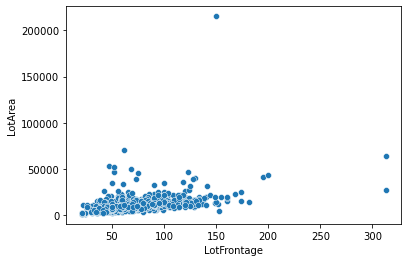

In [12]:
sns.scatterplot(home['LotFrontage'],home['LotArea'])

In [13]:
lot_area_bucket = pd.cut(home['LotArea'], 10)
lot_area_bucket.unique()

[(1086.055, 22694.5], (44089.0, 65483.5], (22694.5, 44089.0], (151061.5, 172456.0], (193850.5, 215245.0], (65483.5, 86878.0], (108272.5, 129667.0]]
Categories (10, interval[float64, right]): [(1086.055, 22694.5] < (22694.5, 44089.0] < (44089.0, 65483.5] < (65483.5, 86878.0] ... (129667.0, 151061.5] < (151061.5, 172456.0] < (172456.0, 193850.5] < (193850.5, 215245.0]]

In [14]:
def lot_area_group(area):
    if float(area):
        if area > 1086.055 and area <= 22694.5:
            return 1
        elif area > 22694.5 and area <= 44089.0:
            return 2
        elif area > 44089.0 and area <= 65483.5:
            return 3
        elif area > 65483.5 and area <= 86878.0:
            return 4
        elif area > 86878.0 and area <= 108272.5:
            return 5
        elif area > 108272.5 and area <= 129667.0:
            return 6
        elif area > 129667.0 and area <= 151061.5:
            return 7
        elif area >151061.5 and area <= 172456.0:
            return 8
        elif area > 172456.0 and area <= 193850.5:
            return 9
        elif area > 193850.5 and area <= 215245.0:
            return 10
        else:
            return -1
    else:
        return -1

In [15]:
home['lotarea_range'] = home['LotArea'].apply(lot_area_group)

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 50000.0)

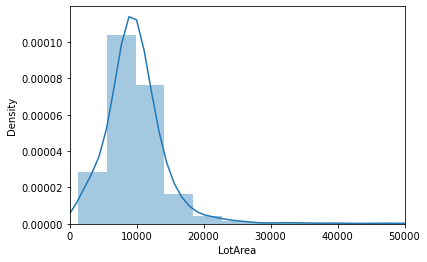

In [16]:
sns.distplot(home['LotArea'])
plt.xlim(0,50000)

In [19]:
home[['LotFrontage','LotArea','lotarea_range']].head()

,LotFrontage,LotArea,lotarea_range
0,65.0,8450,1
1,80.0,9600,1
2,68.0,11250,1
3,60.0,9550,1
4,84.0,14260,1


In [20]:
def fill_miss_lot_frontage(arr):
    lf = arr[0]
    lar = arr[1]
    if pd.isnull(lf):
        if(lar ==1):
            lf = home[home['lotarea_range']==1]['LotFrontage'].mean()
        elif (lar == 2):
            lf = home[home['lotarea_range']==2]['LotFrontage'].mean()
        elif (lar == 3):
            lf = home[home['lotarea_range']==3]['LotFrontage'].mean()
        elif (lar == 4):
            lf = home[home['lotarea_range']==4]['LotFrontage'].mean()
        elif (lar == 5):
            lf = home[home['lotarea_range']==5]['LotFrontage'].mean()
        elif (lar == 6):
            lf = home[home['lotarea_range']==6]['LotFrontage'].mean()
        elif (lar == 7):
            lf = home[home['lotarea_range']==7]['LotFrontage'].mean()
        elif (lar == 8):
            lf = home[home['lotarea_range']==8]['LotFrontage'].mean()
        elif (lar == 9):
            lf = home[home['lotarea_range']==9]['LotFrontage'].mean()
        elif (lar == 10):
            lf = home[home['lotarea_range']==10]['LotFrontage'].mean()
        else:
            lf = home['LotFrontage'].mean()
    return lf

In [21]:
home['LotFrontage'] = home[['LotFrontage','lotarea_range']].apply(fill_miss_lot_frontage,axis=1)

In [22]:
home['LotFrontage'].isna().sum()

3

In [23]:
home[home['LotFrontage'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lotarea_range
249,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000.0,8
335,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249.0,BLQ,147.0,103.0,1499.0,GasA,Ex,Y,SBrkr,1619,167,0,1786,2.0,0.0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2.0,529.0,TA,TA,Y,670,0,0,0,0,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950.0,8
706,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000.0,6


In [24]:
home.drop(index=[249,335,706], inplace=True)

In [25]:
home['float_msn_vnr_area'] = home['MasVnrArea'].apply(float)

In [26]:
home.drop('MasVnrArea', axis=1, inplace=True)

In [27]:
msn_vnr_bucket = pd.cut(home['float_msn_vnr_area'], 10,duplicates='drop')
msn_vnr_bucket.unique()

[(160.0, 320.0], (-1.6, 160.0], (320.0, 480.0], (480.0, 640.0], (640.0, 800.0], ..., (1120.0, 1280.0], (800.0, 960.0], NaN, (1440.0, 1600.0], (1280.0, 1440.0]]
Length: 11
Categories (10, interval[float64, right]): [(-1.6, 160.0] < (160.0, 320.0] < (320.0, 480.0] < (480.0, 640.0] ... (960.0, 1120.0] < (1120.0, 1280.0] < (1280.0, 1440.0] < (1440.0, 1600.0]]

In [28]:
def msn_area_group(area):
    if float(area):
        if area > 0 and area <= 160.0:
            return 1
        elif area > 160.0 and area <=320.0:
            return 2
        elif area > 320.0 and area <= 480.0:
            return 3
        elif area > 480.0 and area <= 640.0:
            return 4
        elif area > 640.0 and area <= 800.0:
            return 5
        elif area > 800.0 and area <=960.0:
            return 6
        elif area > 960.0 and area <= 1120.0:
            return 7
        elif area >1120.0 and area <= 1280.0:
            return 8
        elif area > 1280.0 and area <= 1440.0:
            return 9
        elif area > 1440.0 and area <= 1600.0:
            return 10
        else:
            return -1
    else:
        return -1

In [29]:
home['msn_area_range'] = home['float_msn_vnr_area'].apply(msn_area_group)

In [30]:
home.drop('float_msn_vnr_area', axis=1, inplace=True)

In [31]:
home.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lotarea_range,msn_area_range
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,2
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,-1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,-1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,3


C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

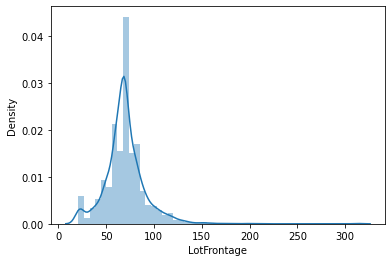

In [32]:
sns.distplot(home['LotFrontage'])

In [33]:
home.drop('GarageYrBlt', axis=1, inplace=True)

## Treating Categorical Variables

In [34]:
labelencoder = LabelEncoder()

In [35]:
home['MSZoning_num'] = labelencoder.fit_transform(home['MSZoning'])

In [36]:
home.drop('MSZoning', axis=1, inplace=True)

In [37]:
home.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,lotarea_range,msn_area_range,MSZoning_num
0,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,2,3
1,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,-1,3
2,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,2,3
3,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,-1,3
4,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,3,3


In [38]:
home['Street_num'] = labelencoder.fit_transform(home['Street'])
home.drop('Street', axis=1, inplace=True)

In [39]:
home['Alley_num'] = labelencoder.fit_transform(home['Alley'])
home.drop('Alley', axis=1, inplace=True)

In [40]:
home['LotShape_num'] = labelencoder.fit_transform(home['LotShape'])
home.drop('LotShape', axis=1, inplace=True)

In [41]:
home['LandContour_num'] = labelencoder.fit_transform(home['LandContour'])
home.drop('LandContour', axis=1, inplace=True)

In [42]:
home['Utilities_num'] = labelencoder.fit_transform(home['Utilities'])
home.drop('Utilities', axis=1, inplace=True)

In [43]:
home['LotConfig_num'] = labelencoder.fit_transform(home['LotConfig'])
home.drop('LotConfig', axis=1, inplace=True)

In [44]:
home['LandSlope_num'] = labelencoder.fit_transform(home['LandSlope'])
home.drop('LandSlope', axis=1, inplace=True)

In [45]:
home['Neighborhood_num'] = labelencoder.fit_transform(home['Neighborhood'])
home.drop('Neighborhood', axis=1, inplace=True)

In [46]:
home['Condition1_num'] = labelencoder.fit_transform(home['Condition1'])
home.drop('Condition1', axis=1, inplace=True)

In [47]:
home['Condition2_num'] = labelencoder.fit_transform(home['Condition2'])
home.drop('Condition2', axis=1, inplace=True)

In [48]:
home['BldgType_num'] = labelencoder.fit_transform(home['BldgType'])
home.drop('BldgType', axis=1, inplace=True)

In [49]:
home['HouseStyle_num'] = labelencoder.fit_transform(home['HouseStyle'])
home.drop('HouseStyle', axis=1, inplace=True)

In [50]:
def house_remod(arr):
    y_build = arr[0]
    y_remod = arr[1]
    if y_build == y_remod:
        value = 1
    else:
        value = 0
    return value

In [51]:
home['house_rebuilt'] = home[['YearBuilt','YearRemodAdd']].apply(house_remod,axis=1)

In [52]:
home[['YearBuilt','YearRemodAdd','house_rebuilt']].head()

,YearBuilt,YearRemodAdd,house_rebuilt
0,2003,2003,1
1,1976,1976,1
2,2001,2002,0
3,1915,1970,0
4,2000,2000,1


In [53]:
home.drop('YearBuilt',axis=1,inplace=True)
home.drop('YearRemodAdd',axis=1,inplace=True)

In [54]:
home['RoofStyle_num'] = labelencoder.fit_transform(home['RoofStyle'])
home.drop('RoofStyle', axis=1, inplace=True)

In [55]:
home['RoofMatl_num'] = labelencoder.fit_transform(home['RoofMatl'])
home.drop('RoofMatl', axis=1, inplace=True)

In [56]:
home['Exterior1st_num'] = labelencoder.fit_transform(home['Exterior1st'])
home.drop('Exterior1st', axis=1, inplace=True)

In [57]:
home['Exterior2nd_num'] = labelencoder.fit_transform(home['Exterior2nd'])
home.drop('Exterior2nd', axis=1, inplace=True)

In [58]:
home['MasVnrType_num'] = labelencoder.fit_transform(home['MasVnrType'])
home.drop('MasVnrType', axis=1, inplace=True)

In [59]:
home['ExterQual_num'] = labelencoder.fit_transform(home['ExterQual'])
home.drop('ExterQual', axis=1, inplace=True)

In [60]:
home['ExterCond_num'] = labelencoder.fit_transform(home['ExterCond'])
home.drop('ExterCond', axis=1, inplace=True)

In [61]:
home['Foundation_num'] = labelencoder.fit_transform(home['Foundation'])
home.drop('Foundation', axis=1, inplace=True)

In [62]:
home['BsmtQual_num'] = labelencoder.fit_transform(home['BsmtQual'])
home.drop('BsmtQual', axis=1, inplace=True)

In [63]:
home['BsmtCond_num'] = labelencoder.fit_transform(home['BsmtCond'])
home.drop('BsmtCond', axis=1, inplace=True)

In [64]:
home['BsmtExposure_num'] = labelencoder.fit_transform(home['BsmtExposure'])
home.drop('BsmtExposure', axis=1, inplace=True)

In [65]:
home['BsmtFinType1_num'] = labelencoder.fit_transform(home['BsmtFinType1'])
home.drop('BsmtFinType1', axis=1, inplace=True)

In [66]:
home['BsmtFinType2_num'] = labelencoder.fit_transform(home['BsmtFinType2'])
home.drop('BsmtFinType2', axis=1, inplace=True)

In [67]:
home['Heating_num'] = labelencoder.fit_transform(home['Heating'])
home.drop('Heating', axis=1, inplace=True)

In [68]:
home['HeatingQC_num'] = labelencoder.fit_transform(home['HeatingQC'])
home.drop('HeatingQC', axis=1, inplace=True)

In [69]:
home['CentralAir_num'] = labelencoder.fit_transform(home['CentralAir'])
home.drop('CentralAir', axis=1, inplace=True)

In [70]:
home['Electrical_num'] = labelencoder.fit_transform(home['Electrical'])
home.drop('Electrical', axis=1, inplace=True)

In [71]:
home['KitchenQual_num'] = labelencoder.fit_transform(home['KitchenQual'])
home.drop('KitchenQual', axis=1, inplace=True)

In [72]:
home['Functional_num'] = labelencoder.fit_transform(home['Functional'])
home.drop('Functional', axis=1, inplace=True)

In [73]:
home['FireplaceQu_num'] = labelencoder.fit_transform(home['FireplaceQu'])
home.drop('FireplaceQu', axis=1, inplace=True)

In [74]:
home['GarageType_num'] = labelencoder.fit_transform(home['GarageType'])
home.drop('GarageType', axis=1, inplace=True)

In [75]:
home['GarageFinish_num'] = labelencoder.fit_transform(home['GarageFinish'])
home.drop('GarageFinish', axis=1, inplace=True)

In [76]:
home['GarageQual_num'] = labelencoder.fit_transform(home['GarageQual'])
home.drop('GarageQual', axis=1, inplace=True)

In [77]:
home['GarageCond_num'] = labelencoder.fit_transform(home['GarageCond'])
home.drop('GarageCond', axis=1, inplace=True)

In [78]:
home['PavedDrive_num'] = labelencoder.fit_transform(home['PavedDrive'])
home.drop('PavedDrive', axis=1, inplace=True)

In [79]:
home['PoolQC_num'] = labelencoder.fit_transform(home['PoolQC'])
home.drop('PoolQC', axis=1, inplace=True)

In [80]:
home['Fence_num'] = labelencoder.fit_transform(home['Fence'])
home.drop('Fence', axis=1, inplace=True)

In [81]:
home['MiscFeature_num'] = labelencoder.fit_transform(home['MiscFeature'])
home.drop('MiscFeature', axis=1, inplace=True)

In [82]:
home['SaleType_num'] = labelencoder.fit_transform(home['SaleType'])
home.drop('SaleType', axis=1, inplace=True)

In [83]:
home['SaleCondition_num'] = labelencoder.fit_transform(home['SaleCondition'])
home.drop('SaleCondition', axis=1, inplace=True)

In [84]:
home.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lotarea_range,msn_area_range,MSZoning_num,Street_num,Alley_num,LotShape_num,LandContour_num,Utilities_num,LotConfig_num,LandSlope_num,Neighborhood_num,Condition1_num,Condition2_num,BldgType_num,HouseStyle_num,house_rebuilt,RoofStyle_num,RoofMatl_num,Exterior1st_num,Exterior2nd_num,MasVnrType_num,ExterQual_num,ExterCond_num,Foundation_num,BsmtQual_num,BsmtCond_num,BsmtExposure_num,BsmtFinType1_num,BsmtFinType2_num,Heating_num,HeatingQC_num,CentralAir_num,Electrical_num,KitchenQual_num,Functional_num,FireplaceQu_num,GarageType_num,GarageFinish_num,GarageQual_num,GarageCond_num,PavedDrive_num,PoolQC_num,Fence_num,MiscFeature_num,SaleType_num,SaleCondition_num
0,60,65.0,8450,7,5,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,1,2,3,1,2,3,3,0,4,0,5,2,2,0,5,1,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4
1,20,80.0,9600,6,8,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,1,-1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4
2,60,68.0,11250,7,5,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,1,2,3,1,2,0,3,0,4,0,5,2,2,0,5,0,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4
3,70,60.0,9550,7,5,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,1,-1,3,1,2,0,3,0,0,0,6,2,2,0,5,0,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0
4,60,84.0,14260,8,5,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,1,3,3,1,2,0,3,0,2,0,15,2,2,0,5,1,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4


In [197]:
 '''
    n_rows = 9
n_cols = 9
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
for i, column in enumerate(home.columns):
    sns.distplot(home[column], ax = axes[i//n_cols,i%n_cols])
'''

'\n   n_rows = 9\nn_cols = 9\nfig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)\nfor i, column in enumerate(home.columns):\n   sns.distplot(home[column], ax = axes[i//n_cols,i%n_cols])\n'

In [86]:
home.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lotarea_range,msn_area_range,MSZoning_num,Street_num,Alley_num,LotShape_num,LandContour_num,Utilities_num,LotConfig_num,LandSlope_num,Neighborhood_num,Condition1_num,Condition2_num,BldgType_num,HouseStyle_num,house_rebuilt,RoofStyle_num,RoofMatl_num,Exterior1st_num,Exterior2nd_num,MasVnrType_num,ExterQual_num,ExterCond_num,Foundation_num,BsmtQual_num,BsmtCond_num,BsmtExposure_num,BsmtFinType1_num,BsmtFinType2_num,Heating_num,HeatingQC_num,CentralAir_num,Electrical_num,KitchenQual_num,Functional_num,FireplaceQu_num,GarageType_num,GarageFinish_num,GarageQual_num,GarageCond_num,PavedDrive_num,PoolQC_num,Fence_num,MiscFeature_num,SaleType_num,SaleCondition_num
MSSubClass,1.000000,-0.387153,-0.262105,0.033722,-0.065560,-0.064398,-0.073052,-0.126325,-0.220618,-0.248873,0.309546,0.025400,0.071759,0.008430,-0.001059,0.137883,0.179701,-0.008524,0.261659,0.041068,-0.055535,-0.047511,-0.103425,-0.020851,-0.016564,-0.020092,-0.037427,-0.048692,-0.002941,-0.030051,-0.001841,-0.013209,-0.084978,-0.039192,0.013354,0.026580,0.019462,-0.107350,0.089095,-0.002672,-0.024077,0.074140,-0.032177,-0.002246,-0.029441,-0.030027,0.741474,0.389184,0.048433,-0.132905,-0.025581,-0.112507,-0.147177,-0.013390,-0.015686,-0.001975,0.053726,-0.036884,-0.011369,-0.073291,-0.001925,0.049748,0.042132,0.020696,-0.080355,0.043633,0.026094,0.014155,0.064973,0.140237,0.038372,0.061162,0.048377,-0.027468,0.009839,0.085906,0.045461,0.029030,-0.021210
LotFrontage,-0.387153,1.000000,0.485531,0.200623,-0.076959,0.203363,0.044691,0.107580,0.334580,0.428503,0.024365,0.004463,0.353010,0.101161,-0.020983,0.164861,0.037799,0.209360,0.004675,0.320201,0.242505,0.293907,0.340901,0.106469,0.153210,0.024838,0.023128,0.068263,0.157896,0.034629,0.004886,-0.006898,0.333884,0.221032,0.192571,-0.099480,-0.048094,0.145363,-0.138663,-0.052669,0.048298,-0.176488,0.083442,0.100255,-0.019223,0.007525,-0.434794,0.012498,0.037827,0.172227,0.093126,0.075824,0.111221,-0.030655,-0.165589,0.012257,0.103754,-0.141175,0.031774,-0.134055,-0.012067,-0.013179,-0.003019,-0.084190,0.064599,0.054737,-0.184813,-0.040640,-0.201906,-0.272837,-0.208295,0.026861,0.001933,0.053655,-0.125526,-0.004384,-0.016541,-0.027826,0.026037
LotArea,-0.262105,0.485531,1.000000,0.125242,-0.053926,0.205794,0.100594,0.033091,0.284253,0.376887,0.039644,0.003440,0.325873,0.130975,0.005008,0.135970,0.057832,0.153798,-0.020908,0.257578,0.269026,0.211718,0.251730,0.147421,0.127190,0.032782,0.021464,0.071622,0.114542,0.068380,0.000663,-0.023614,0.300467,0.828679,0.104324,-0.027627,-0.037918,0.082915,-0.199064,-0.110107,0.066410,-0.109336,0.244045,0.056055,0.039193,0.024676,-0.307959,-0.004749,0.003190,0.128374,0.169420,0.011637,0.038596,-0.009824,-0.084286,-0.011812,0.031168,-0.084967,0.014117,-0.120837,-0.042533,-0.026579,0.041010,-0.015508,0.056398,0.037806,-0.096942,-0.099692,-0.181611,-0.187203,-0.120251,-0.005772,-0.018618,-0.000293,-0.072240,0.022317,-0.028126,-0.001758,0.019479
OverallQual,0.033722,0.200623,0.125242,1.000000,-0.093450,0.282833,-0.042448,0.274944,0.550172,0.480353,0.245524,-0.048774,0.575652,0.165839,-0.040666,0.528632,0.272778,0.073652,-0.159303,0.390704,0.392495,0.600867,0.565364,0.257632,0.297854,-0.139180,0.018760,0.043035,0.030774,0.005945,0.030643,-0.018868,0.792108,0.027351,0.444971,-0.180941,0.071312,0.108057,-0.259853,-0.025484,-0.036979,-0.037004,-0.023598,0.209338,0.103078,0.045821,0.079712,0.206399,0.088843,0.199832,0.047215,0.172058,0.153705,-0.023330,-0.632483,0.170124,0.407649,-0.609114,0.016106,-0.300522,-0.068912,0.023212,-0.108419,-0.445833,0.286897,0.253490,-0.565905,0.176619,-0.425114,-0.418352,-0.553106,0.062402,0.057995,0.298567,-0.078271

C:\Users\aurlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lotarea_range', ylabel='SalePrice'>

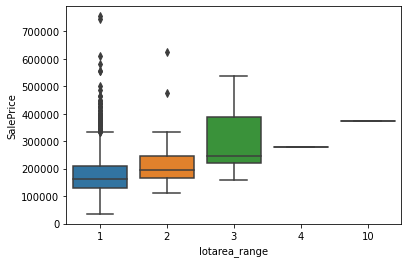

In [87]:
sns.boxplot(home['lotarea_range'],home['SalePrice'])

(0.0, 50000.0)

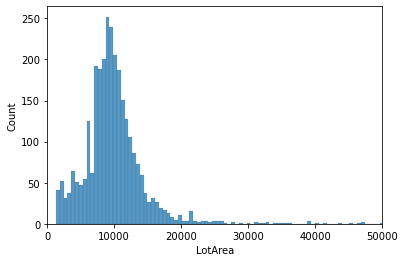

In [88]:
sns.histplot(home['LotArea'])
plt.xlim(0,50000)

In [89]:
home.drop('LotArea', axis=1, inplace=True)

In [90]:
scaler = MinMaxScaler()

In [91]:
home.isna().sum()

MSSubClass              0
LotFrontage             0
OverallQual             0
OverallCond             0
BsmtFinSF1              1
BsmtFinSF2              1
BsmtUnfSF               1
TotalBsmtSF             1
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea               0
BsmtFullBath            2
BsmtHalfBath            2
FullBath                0
HalfBath                0
BedroomAbvGr            0
KitchenAbvGr            0
TotRmsAbvGrd            0
Fireplaces              0
GarageCars              1
GarageArea              1
WoodDeckSF              0
OpenPorchSF             0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
SalePrice            1457
lotarea_range           0
msn_area_range          0
MSZoning_num            0
Street_num              0
Alley_num               0
LotShape_num            0
LandContour_

In [92]:
home[home['BsmtFinSF1'].isna()]

,MSSubClass,LotFrontage,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lotarea_range,msn_area_range,MSZoning_num,Street_num,Alley_num,LotShape_num,LandContour_num,Utilities_num,LotConfig_num,LandSlope_num,Neighborhood_num,Condition1_num,Condition2_num,BldgType_num,HouseStyle_num,house_rebuilt,RoofStyle_num,RoofMatl_num,Exterior1st_num,Exterior2nd_num,MasVnrType_num,ExterQual_num,ExterCond_num,Foundation_num,BsmtQual_num,BsmtCond_num,BsmtExposure_num,BsmtFinType1_num,BsmtFinType2_num,Heating_num,HeatingQC_num,CentralAir_num,Electrical_num,KitchenQual_num,Functional_num,FireplaceQu_num,GarageType_num,GarageFinish_num,GarageQual_num,GarageCond_num,PavedDrive_num,PoolQC_num,Fence_num,MiscFeature_num,SaleType_num,SaleCondition_num
2120,20,99.0,4,7,NaN,NaN,NaN,NaN,896,0,0,896,NaN,NaN,1,0,2,1,4,0,1.0,280.0,0,0,0,0,0,0,0,4,2008,NaN,1,-1,4,1,2,0,3,0,3,0,3,1,2,0,2,0,1,1,8,4,2,3,4,2,4,4,4,6,6,1,4,1,0,3,6,5,5,2,4,4,2,3,2,4,3,0


In [93]:
home.drop(index=[2120], inplace=True)

In [94]:
home[home['BsmtFullBath'].isna()]

,MSSubClass,LotFrontage,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lotarea_range,msn_area_range,MSZoning_num,Street_num,Alley_num,LotShape_num,LandContour_num,Utilities_num,LotConfig_num,LandSlope_num,Neighborhood_num,Condition1_num,Condition2_num,BldgType_num,HouseStyle_num,house_rebuilt,RoofStyle_num,RoofMatl_num,Exterior1st_num,Exterior2nd_num,MasVnrType_num,ExterQual_num,ExterCond_num,Foundation_num,BsmtQual_num,BsmtCond_num,BsmtExposure_num,BsmtFinType1_num,BsmtFinType2_num,Heating_num,HeatingQC_num,CentralAir_num,Electrical_num,KitchenQual_num,Functional_num,FireplaceQu_num,GarageType_num,GarageFinish_num,GarageQual_num,GarageCond_num,PavedDrive_num,PoolQC_num,Fence_num,MiscFeature_num,SaleType_num,SaleCondition_num
2188,20,123.0,5,7,0.0,0.0,0.0,0.0,3820,0,0,3820,NaN,NaN,3,1,5,1,11,2,2.0,624.0,0,372,0,0,0,0,0,7,2008,NaN,3,-1,3,1,2,0,3,0,4,0,7,2,2,0,2,0,1,1,9,10,2,3,4,3,4,4,4,6,6,1,4,1,4,0,6,2,1,2,4,4,2,3,4,4,8,4


In [95]:
home.drop(index=[2188], inplace=True)

In [96]:
home[home['GarageArea'].isna()]

,MSSubClass,LotFrontage,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lotarea_range,msn_area_range,MSZoning_num,Street_num,Alley_num,LotShape_num,LandContour_num,Utilities_num,LotConfig_num,LandSlope_num,Neighborhood_num,Condition1_num,Condition2_num,BldgType_num,HouseStyle_num,house_rebuilt,RoofStyle_num,RoofMatl_num,Exterior1st_num,Exterior2nd_num,MasVnrType_num,ExterQual_num,ExterCond_num,Foundation_num,BsmtQual_num,BsmtCond_num,BsmtExposure_num,BsmtFinType1_num,BsmtFinType2_num,Heating_num,HeatingQC_num,CentralAir_num,Electrical_num,KitchenQual_num,Functional_num,FireplaceQu_num,GarageType_num,GarageFinish_num,GarageQual_num,GarageCond_num,PavedDrive_num,PoolQC_num,Fence_num,MiscFeature_num,SaleType_num,SaleCondition_num
2576,70,50.0,5,6,548.0,0.0,311.0,859.0,942,886,0,1828,0.0,0.0,2,0,3,1,6,0,NaN,NaN,174,0,212,0,0,0,0,3,2007,NaN,1,-1,4,1,2,3,3,0,4,0,9,2,2,0,5,0,1,1,13,10,2,3,4,0,2,3,3,0,5,1,0,1,4,2,6,5,5,3,5,5,2,3,2,4,8,2


In [97]:
home.drop(index=[2576], inplace=True)

In [98]:
home_scale = pd.DataFrame(scaler.fit_transform(home), columns= home.columns)

In [99]:
home_scale.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,lotarea_range,msn_area_range,MSZoning_num,Street_num,Alley_num,LotShape_num,LandContour_num,Utilities_num,LotConfig_num,LandSlope_num,Neighborhood_num,Condition1_num,Condition2_num,BldgType_num,HouseStyle_num,house_rebuilt,RoofStyle_num,RoofMatl_num,Exterior1st_num,Exterior2nd_num,MasVnrType_num,ExterQual_num,ExterCond_num,Foundation_num,BsmtQual_num,BsmtCond_num,BsmtExposure_num,BsmtFinType1_num,BsmtFinType2_num,Heating_num,HeatingQC_num,CentralAir_num,Electrical_num,KitchenQual_num,Functional_num,FireplaceQu_num,GarageType_num,GarageFinish_num,GarageQual_num,GarageCond_num,PavedDrive_num,PoolQC_num,Fence_num,MiscFeature_num,SaleType_num,SaleCondition_num
0,0.235294,0.150685,0.666667,0.500,0.125089,0.0,0.064212,0.140098,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078,0.0,0.272727,0.6,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,1.0,0.2,0.142857,0.800000,0.8125,0.25,0.666667,1.0,0.4,0.50,0.75,0.75,0.333333,0.833333,0.2,0.0,1.0,0.8,0.50,0.857143,1.0,0.166667,0.333333,0.8,0.8,1.0,1.0,1.0,1.0,0.888889,0.8
1,0.000000,0.202055,0.555556,0.875,0.173281,0.0,0.121575,0.206547,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.4,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583,0.0,0.000000,0.6,1.0,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,1.0,0.2,0.142857,0.533333,0.5000,0.50,1.000000,1.0,0.2,0.50,0.75,0.25,0.000000,0.833333,0.2,0.0,1.0,0.8,0.75,0.857143,0.8,0.166667,0.333333,0.8,0.8,1.0,1.0,1.0,1.0,0.888889,0.8
2,0.235294,0.160959,0.666667,0.500,0.086109,0.0,0.185788,0.150573,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.4,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908,0.0,0.272727,0.6,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.0,0.2,0.142857,0.800000,0.8125,0.25,0.666667,1.0,0.4,0.50,0.75,0.50,0.333333,0.833333,0.2,0.0,1.0,0.8,0.50,0.857143,0.8,0.166667,0.333333,0.8,0.8,1.0,1.0,1.0,1.0,0.888889,0.8
3,0.294118,0.133562,0.666667,0.500,0.038271,0.0,0.231164,0.123732,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.6,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952,0.0,0.000000,0.6,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.0,0.2,0.142857,0.866667,0.9375,0.50,1.000000,1.0,0.0,0.75,0.25,0.75,0.000000,0.833333,0.2,0.5,1.0,0.8,0.50,0.857143,0.4,0.833333,0.666667,0.8,0.8,1.0,1.0,1.0,1.0,0.888889,0.0
4,0.235294,0.215753,0.777778,0.500,0.116052,0.0,0.209760,0.187398,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.6,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709,0.0,0.363636,0.6,1.0,1.0,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,1.0,0.2,0.142857,0.800000,0.8125,0.25,0.666667,1.0,0.4,0.50,0.75,0.00,0.333333,0.833333,0.2,0.0,1.0,0.8,0.50,0.857143,0.8,0.166667,0.333333,0.8,0.8,1.0,1.0,1.0,1.0,0.888889,0.8
